In [4]:
# only for taurus
import os
print(os.getcwd())
os.chdir("/home/jori152b/DIR/horse/jori152b-medinf/KP_MedInf/model_development")
# print(os.getcwd())

/data/horse/ws/jori152b-medinf/KP_MedInf


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [18]:
df = pd.read_csv('../data/analysis/data_preprocessed_extended_before_resampling.csv', parse_dates=['charttime'])

In [16]:
x1 = pd.read_csv('../data/preprocessed/preprocessed_data_extended_6H.csv', parse_dates=['charttime'])
x2 = pd.read_csv('../data/preprocessed/preprocessed_data.csv', parse_dates=['charttime'])

In [6]:
print(x1.columns)
print(x2.columns)

Index(['icustay_id', 'charttime', 'albumin_mean', 'aniongap_mean',
       'bands_mean', 'bicarbonate_mean', 'bilirubin_mean', 'bun_mean',
       'calcium', 'calcium_mean', 'chloride_mean', 'creat', 'creatinine_mean',
       'diasbp_mean', 'glucose_mean_x', 'glucose_mean_y', 'heartrate_mean',
       'hematocrit_mean', 'hemoglobin_mean', 'inr_mean', 'lactate_mean',
       'meanbp_mean', 'phosphate_mean', 'platelet_mean', 'potassium_mean',
       'pt_mean', 'ptt_mean', 'resprate_mean', 'sodium_mean', 'spo2_mean',
       'subject_id', 'sysbp_mean', 'tempc_mean', 'uo_rt_12hr', 'uo_rt_24hr',
       'uo_rt_6hr', 'uric_acid_mean', 'wbc_mean', 'sedative', 'vasopressor',
       'vent', 'hadm_id', 'aki_stage', 'admission_age', 'gender_F', 'gender_M',
       'ethnicity_grouped_asian', 'ethnicity_grouped_black',
       'ethnicity_grouped_hispanic', 'ethnicity_grouped_native',
       'ethnicity_grouped_other', 'ethnicity_grouped_unknown',
       'ethnicity_grouped_white', 'weight_first', 'height_fir

In [17]:
# get the difference in columns between x1 and x2
print(x1.columns.difference(x2.columns))

Index(['albumin_mean', 'bands_mean', 'bilirubin_mean', 'calcium',
       'calcium_mean', 'inr_mean', 'lactate_mean', 'phosphate_mean',
       'platelet_mean', 'pt_mean', 'ptt_mean', 'uric_acid_mean'],
      dtype='object')


In [ ]:
stats = df.describe()
print(stats)    
# save to csv
stats.to_csv('data/analysis/data_preprocessed_extended_stats.csv', index=False)

In [19]:
# Initialize a dictionary to store results
results = {}

# List of columns to analyze (excluding the datetime and other non-measurement columns)
columns_to_analyze = df.columns.difference(['icustay_id', 'charttime', 'hadm_id', 'subject_id'])

# Group by icustay_id
grouped = df.groupby('icustay_id')

# Iterate through each column to analyze
for column in columns_to_analyze:
    frequencies = []
    mean_time_diffs = []
    std_time_diffs = []
    max_time_diffs = []
    min_time_diffs = []

    # Iterate through each group (each icustay_id)
    for icustay_id, group in grouped:
        valid_rows = group[group[column].notna()]

        frequency = valid_rows.shape[0]
        if frequency > 1:
            time_diffs = valid_rows['charttime'].diff().dropna().dt.total_seconds() / 60  # in minutes

            mean_time_diff = time_diffs.mean()
            std_time_diff = time_diffs.std()
            max_time_diff = time_diffs.max()
            min_time_diff = time_diffs.min()
        else:
            mean_time_diff = std_time_diff = max_time_diff = min_time_diff = None

        frequencies.append(frequency)
        mean_time_diffs.append(mean_time_diff)
        std_time_diffs.append(std_time_diff)
        max_time_diffs.append(max_time_diff)
        min_time_diffs.append(min_time_diff)

    # Aggregate the statistics across all icustay_id groups
    overall_frequency = sum(frequencies)
    overall_mean_time_diff = pd.Series(mean_time_diffs).mean()
    overall_std_time_diff = pd.Series(std_time_diffs).mean()
    overall_max_time_diff = pd.Series(max_time_diffs).max()
    overall_min_time_diff = pd.Series(min_time_diffs).min()

    results[column] = {
        'frequency': overall_frequency,
        'mean_time_diff': overall_mean_time_diff,
        'std_time_diff': overall_std_time_diff,
        'max_time_diff': overall_max_time_diff,
        'min_time_diff': overall_min_time_diff
    }

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results).T
print(results_df)

# Optionally, save the results to a CSV file
results_df.to_csv('../data/analysis/measurement_statistics_by_icustay.csv')


KeyboardInterrupt: 

In [ ]:
# drop all the columns in string format
X.drop(['first_hosp_stay'], axis=1, inplace = True)
X.drop(['first_icu_stay'], axis=1, inplace = True)
X.drop(['ethnicity'], axis=1, inplace = True)
X.drop(['admittime'], axis=1, inplace = True)
X.drop(['dischtime'], axis=1, inplace = True)
X.drop(['intime'], axis=1, inplace = True)
X.drop(['outtime'], axis=1, inplace = True)
X.drop(['dod'], axis=1, inplace = True)
X.drop(['charttime'], axis=1, inplace = True)


In [22]:
X = x1

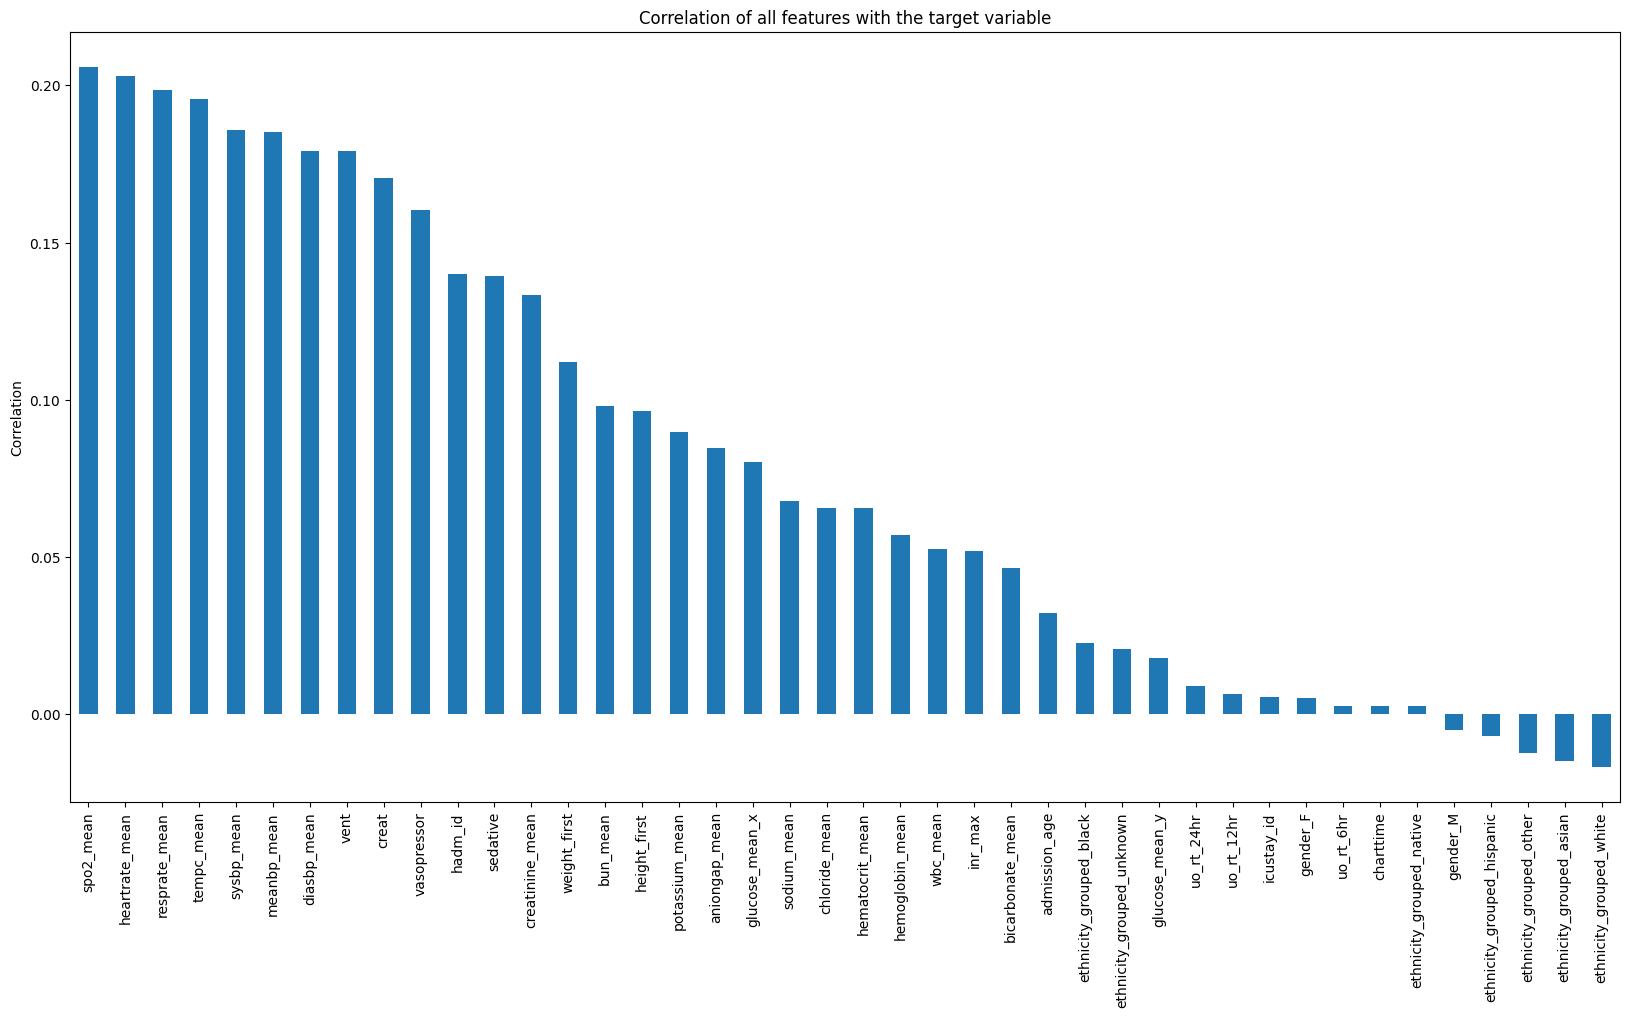

In [23]:
# Calculate correlations
correlations = X.corr()['aki_stage'].drop('aki_stage').sort_values(ascending=False)

# Create bar chart
plt.figure(figsize=(20,10))
correlations.plot(kind='bar')
plt.title('Correlation of all features with the target variable')
plt.ylabel('Correlation')
plt.show()

In [ ]:
# calculate the frequency of each attribute, i.e. the distribution of non nan values
X.apply(lambda x: x.count(), axis=0)

In [4]:
# read np dict
results_lstm = np.load('model_development/notebooks/data/results_LSTM.npy', allow_pickle=True).item()   
results_xgb = np.load('model_development/notebooks/data/results.npy', allow_pickle=True).item()

In [5]:
print(results_lstm)
print(results_xgb)

{'preprocessed_data_extended_1H.csv': {'test_accuracy': 0.9739658519986388, 'test_loss': 0.06725814193487167, 'test_roc_auc': np.float64(0.964657156890119), 'test_pr_auc': np.float64(0.41902424717837267)}, 'preprocessed_data_extended_2H.csv': {'test_accuracy': 0.9698639265389896, 'test_loss': 0.07802687585353851, 'test_roc_auc': np.float64(0.9628054572585586), 'test_pr_auc': np.float64(0.43951711880553745)}, 'preprocessed_data_extended_3H.csv': {'test_accuracy': 0.9669921134072077, 'test_loss': 0.08434353768825531, 'test_roc_auc': np.float64(0.960440553579752), 'test_pr_auc': np.float64(0.44818662860610947)}, 'preprocessed_data_extended_4H.csv': {'test_accuracy': 0.9649187737629948, 'test_loss': 0.08847390860319138, 'test_roc_auc': np.float64(0.958852136741157), 'test_pr_auc': np.float64(0.4675972267283273)}, 'preprocessed_data_extended_5H.csv': {'test_accuracy': 0.9604470899470899, 'test_loss': 0.09769538789987564, 'test_roc_auc': np.float64(0.9557588492046037), 'test_pr_auc': np.floa

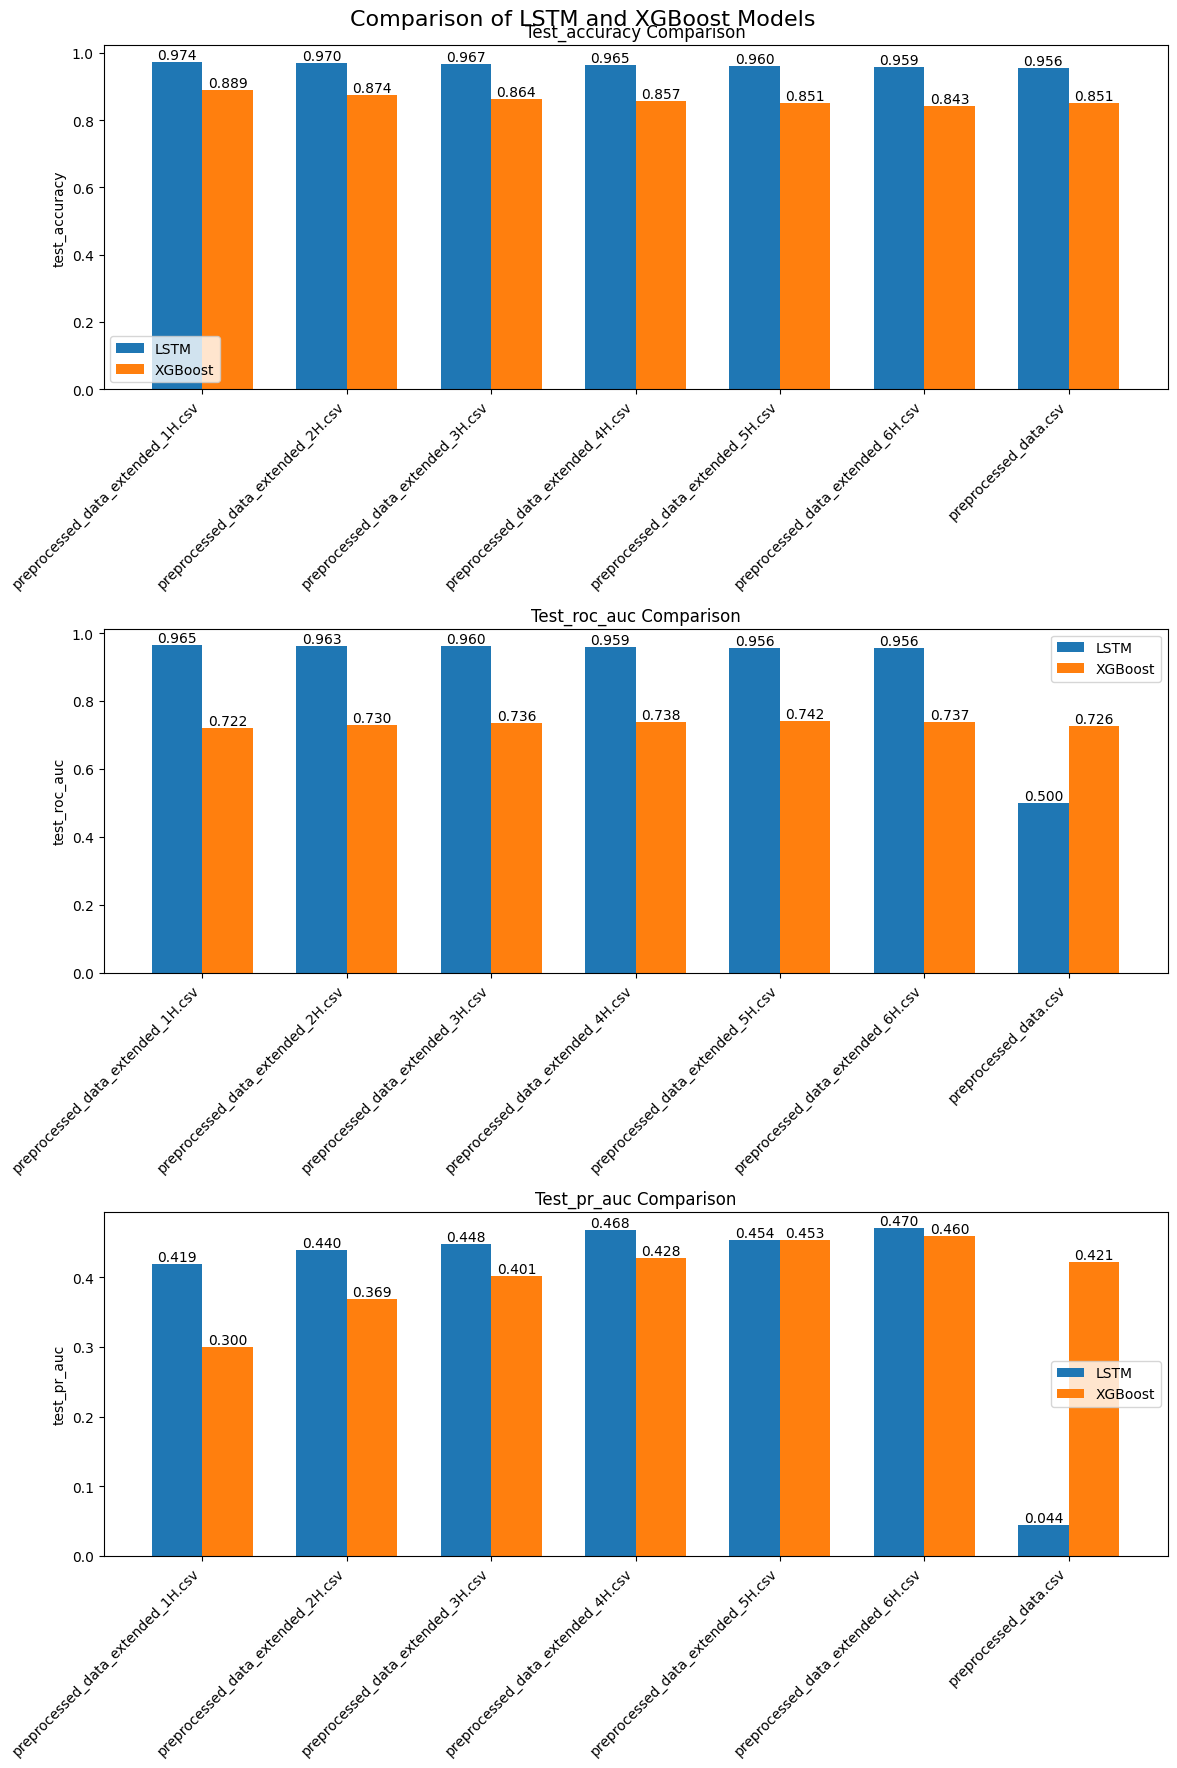

: 

: 

In [6]:
# Extract dataset names and metrics
datasets = list(results_lstm.keys())
metrics = ['test_accuracy', 'test_roc_auc', 'test_pr_auc']

# Set up the plot
fig, axs = plt.subplots(3, 1, figsize=(12, 18))
fig.suptitle('Comparison of LSTM and XGBoost Models', fontsize=16)

# Plot each metric
for i, metric in enumerate(metrics):
    lstm_values = [results_lstm[dataset][metric] for dataset in datasets]
    xgb_values = [results_xgb[dataset][metric] for dataset in datasets]
    
    x = np.arange(len(datasets))
    width = 0.35
    
    axs[i].bar(x - width/2, lstm_values, width, label='LSTM')
    axs[i].bar(x + width/2, xgb_values, width, label='XGBoost')
    
    axs[i].set_ylabel(metric)
    axs[i].set_title(f'{metric.capitalize()} Comparison')
    axs[i].set_xticks(x)
    axs[i].set_xticklabels(datasets, rotation=45, ha='right')
    axs[i].legend()

    # Add value labels on top of each bar
    for j, v in enumerate(lstm_values):
        axs[i].text(j - width/2, v, f'{v:.3f}', ha='center', va='bottom')
    for j, v in enumerate(xgb_values):
        axs[i].text(j + width/2, v, f'{v:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [6]:
feature_selection_results = np.load('data/optimal_features.npy', allow_pickle=True)

In [8]:
feature_selection_results = np.load('data/feature_importances.npy', allow_pickle=True)


In [9]:
print(feature_selection_results)

[{'n_features': 5, 'val_roc_auc': np.float64(0.7180999849250095), 'val_pr_auc': np.float64(0.427843737063509), 'sorted_importance': [('uo_rt_6hr', np.float32(0.3313103)), ('uo_rt_24hr', np.float32(0.19591747)), ('creat', np.float32(0.17808682)), ('resprate_mean', np.float32(0.164883)), ('heartrate_mean', np.float32(0.12980239))]}
 {'n_features': 10, 'val_roc_auc': np.float64(0.7340713645817856), 'val_pr_auc': np.float64(0.44611092247295225), 'sorted_importance': [('uo_rt_6hr', np.float32(0.2173429)), ('heartrate_mean', np.float32(0.15014695)), ('uo_rt_24hr', np.float32(0.12988454)), ('creat', np.float32(0.111984126)), ('creatinine_mean', np.float32(0.08889239)), ('vasopressor', np.float32(0.08431496)), ('vent', np.float32(0.062062938)), ('calcium', np.float32(0.056151975)), ('resprate_mean', np.float32(0.055229656)), ('uo_rt_12hr', np.float32(0.043989595))]}
 {'n_features': 15, 'val_roc_auc': np.float64(0.781050233380914), 'val_pr_auc': np.float64(0.494967577995597), 'sorted_importance

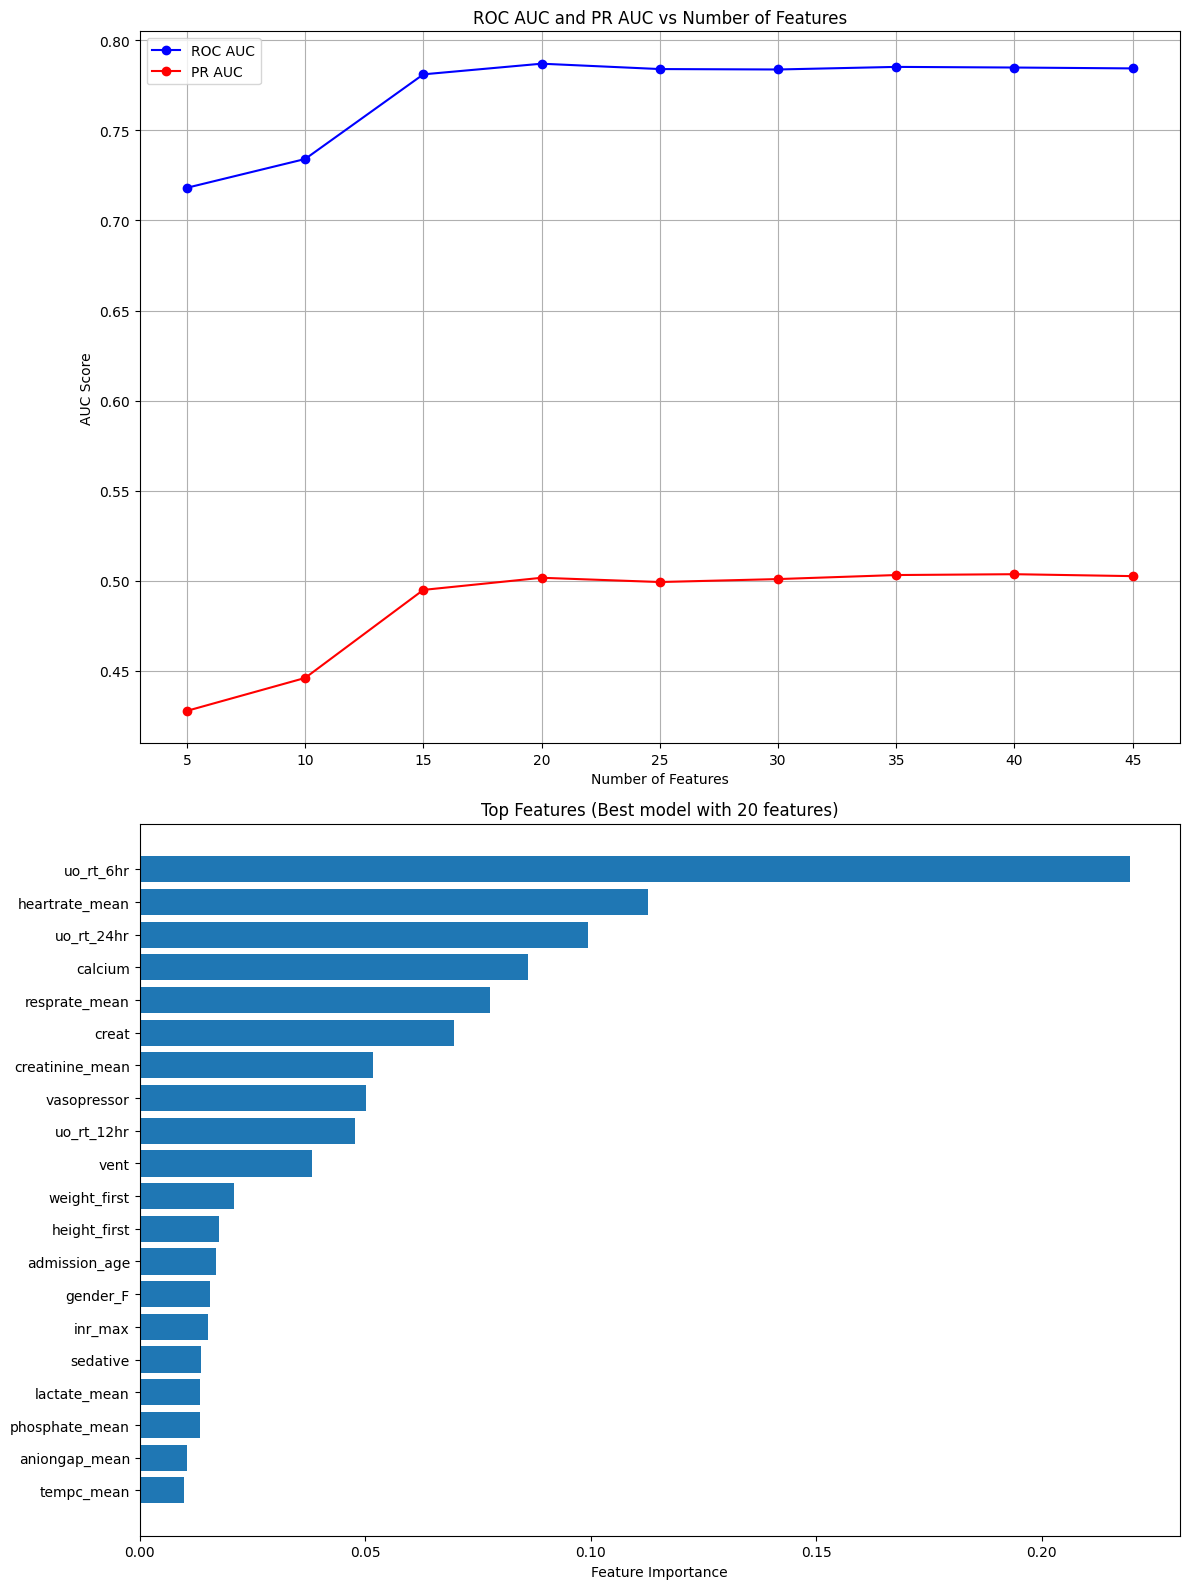

In [12]:
import matplotlib.pyplot as plt
import numpy as np

results = feature_selection_results
# Extract data from the results
n_features = [result['n_features'] for result in results]
val_roc_auc = [result['val_roc_auc'] for result in results]
val_pr_auc = [result['val_pr_auc'] for result in results]

# Create the plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 16))

# Plot ROC AUC and PR AUC
ax1.plot(n_features, val_roc_auc, 'b-o', label='ROC AUC')
ax1.plot(n_features, val_pr_auc, 'r-o', label='PR AUC')
ax1.set_xlabel('Number of Features')
ax1.set_ylabel('AUC Score')
ax1.set_title('ROC AUC and PR AUC vs Number of Features')
ax1.legend()
ax1.grid(True)

# Find the best performing model (highest ROC AUC)
best_model_index = np.argmax(val_roc_auc)
best_model = results[best_model_index]

# Get top 15 features from the best model
top_features = best_model['sorted_importance']
feature_names = [feature[0] for feature in top_features]
feature_importance = [feature[1] for feature in top_features]

# Plot feature importance for the best model
ax2.barh(range(len(feature_names)), feature_importance, align='center')
ax2.set_yticks(range(len(feature_names)))
ax2.set_yticklabels(feature_names)
ax2.invert_yaxis()  # Labels read top-to-bottom
ax2.set_xlabel('Feature Importance')
ax2.set_title(f'Top Features (Best model with {best_model["n_features"]} features)')

plt.tight_layout()
plt.show()